In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [5]:
df.drop(labels=['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

### Task 1: Using Cross validation to improve the model

In [6]:
x_data = df.drop(labels=['Price'], axis=1)
y_data = df['Price']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_train.shape:  (214, 13)
y_train.shape:  (214,)
x_test.shape:  (24, 13)
y_test.shape:  (24,)


In [8]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train[['CPU_frequency']], y_train)
r2_score_train = slr.score(x_train[['CPU_frequency']], y_train)
r2_score_test = slr.score(x_test[['CPU_frequency']], y_test)

In [9]:
from sklearn.model_selection import cross_val_score
slr = LinearRegression()
slr.fit(x_train[['CPU_frequency']], y_train)
cross_val_scores = cross_val_score(slr, x_train[['CPU_frequency']], y_train)
print(f'Folds:\n\tMean: {np.mean(cross_val_scores)}\n\tStddev: {np.std(cross_val_scores)}')

Folds:
	Mean: 0.1031699958914919
	Stddev: 0.09162531299331604


### Task 2: Overfitting

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=1)
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_train.shape:  (119, 13)
y_train.shape:  (119,)
x_test.shape:  (119, 13)
y_test.shape:  (119,)


In [11]:
from sklearn.preprocessing import PolynomialFeatures
lre = LinearRegression()
r2_scores = []
poly_degrees = [1, 2, 3, 4, 5]
for poly_degree in poly_degrees:
    pf = PolynomialFeatures(degree=poly_degree)
    x_train_pf = pf.fit_transform(x_train[['CPU_frequency']])
    x_test_pf = pf.fit_transform(x_test[['CPU_frequency']])
    lre.fit(x_train_pf, y_train)
    r2_scores.append(lre.score(x_test_pf, y_test))
print('R^2 Scores: ', r2_scores)
x_train_pf[0]

R^2 Scores:  [0.0286194117201638, 0.145208833233049, 0.15681605330238757, 0.12721267717781048, 0.03547064602499095]


array([1.        , 0.86206897, 0.7431629 , 0.64065767, 0.5522911 ,
       0.47611302])

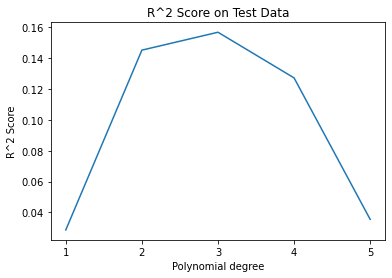

In [12]:
plt.plot(poly_degrees, r2_scores)
plt.title('R^2 Score on Test Data')
plt.xlabel(xlabel='Polynomial degree')
plt.ylabel(ylabel='R^2 Score')
plt.xticks(np.arange(1, 6, 1))
plt.show()

### Task 3: Ridge Regression

In [13]:
pf = PolynomialFeatures(degree=2)
x_train_pf = pf.fit_transform(x_train[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']])
x_test_pf = pf.fit_transform(x_test[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']])

In [14]:
from sklearn.linear_model import Ridge
alphas = list(np.arange(0.001, 1.001, 0.001))
r2_scores_test = []
r2_scores_train = []
for alpha in alphas:
    rr = Ridge(alpha=alpha)
    rr.fit(x_train_pf, y_train)
    test_score = rr.score(x_test_pf, y_test)
    train_score = rr.score(x_train_pf, y_train)
    r2_scores_test.append(test_score)
    r2_scores_train.append(train_score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


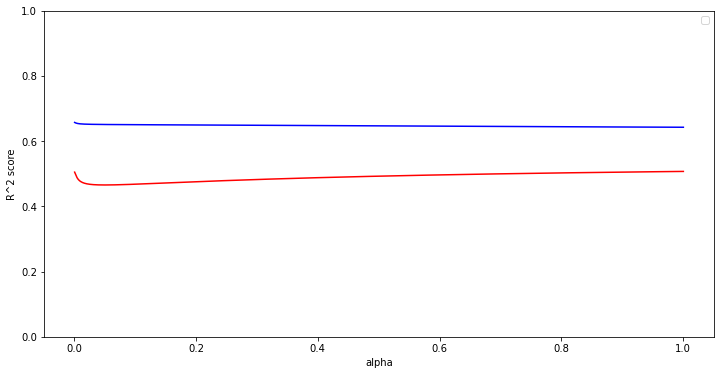

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(alphas, r2_scores_test, 'r')
plt.plot(alphas, r2_scores_train, 'b')
plt.xlabel('alpha')
plt.ylabel('R^2 score')
plt.ylim(0, 1)
plt.legend()

### Task 4: Grid search

In [19]:
from sklearn.model_selection import GridSearchCV
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
grs = GridSearchCV(estimator=Ridge(), param_grid=[{'alpha': alphas}], cv=4)

In [20]:
grs.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [21]:
best_rr = grs.best_estimator_
print(best_rr.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_test))

0.42296349452687465
